# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

In [ ]:
# Your code to explore the data
# qucik statistical summary
df_flights.describe()


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [3]:
# Create a DataFrame with the data sorted by DepDelay (descending)
df_flights_sorted = df_flights.sort_values(by='DepDelay', ascending=False)
# Display the top 10 rows of the sorted DataFrame
df_flights_sorted.head(10)

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
180503,2013,4,3,3,AA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13303,Miami International,Miami,FL,755,1425,1.0,950,1429,1,0
251813,2013,7,2,2,AA,12889,McCarran International,Las Vegas,NV,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,805,1386,1.0,1250,1394,1,0
255631,2013,6,17,1,AA,14771,San Francisco International,San Francisco,CA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,905,1366,1.0,1435,1348,1,0
32883,2013,4,1,1,AA,13871,Eppley Airfield,Omaha,NE,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,840,1320,1.0,1045,1301,1,0
121919,2013,4,17,3,AA,14492,Raleigh-Durham International,Raleigh/Durham,NC,13930,Chicago O'Hare International,Chicago,IL,1425,1305,1.0,1535,1440,1,0
241527,2013,10,18,5,AA,14679,San Diego International,San Diego,CA,13930,Chicago O'Hare International,Chicago,IL,930,1281,1.0,1525,1267,1,0
6537,2013,6,17,1,MQ,10821,Baltimore/Washington International Thurgood Ma...,Baltimore,MD,13930,Chicago O'Hare International,Chicago,IL,2010,1172,1.0,2125,1175,1,0
95648,2013,4,19,5,HA,12892,Los Angeles International,Los Angeles,CA,12173,Honolulu International,Honolulu,HI,1040,1158,1.0,1310,1172,1,0
214288,2013,6,7,5,MQ,13931,Norfolk International,Norfolk,VA,13303,Miami International,Miami,FL,1900,1091,1.0,2125,1114,1,0
14320,2013,6,30,7,MQ,12451,Jacksonville International,Jacksonville,FL,13303,Miami International,Miami,FL,1540,977,1.0,1705,977,1,0


In [4]:
# find any missing values in the dataset
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [5]:
# Remove rows with missing values
df_flights_cleaned = df_flights.dropna()
df_flights_cleaned.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

In [ ]:
# summary statistics after cleaning to answer questions about mean, median, std, min, max, etc.
# See DepDelay, ArrDelay, AirTime, Distance
# Example output:
# DepDelay: Mean = 12.64, Median = 4.0, Std = 39.77, Min = -43, Max = 1301
# ArrDelay: Mean = 10.93, Median = 3.0, Std = 40.03, Min = -50, Max = 1296
# AirTime: Mean = 152.37, Median = 130.0, Std = 85.25, Min = 23, Max = 780
# Distance: Mean = 810.68, Median = 622.0, Std = 629.12, Min = 31, Max = 4983
df_flights_cleaned.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,269179.0,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000,269179.000000
mean,2013.0,6.983877,15.817259,3.902336,12744.767642,12739.446093,1324.412933,10.456614,0.201134,1504.637338,6.563287,0.207888,0.000576
std,0.0,1.983873,8.805963,1.989296,1501.949045,1503.506863,470.760511,35.840715,0.400849,493.215438,38.420207,0.405797,0.023989
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1319.000000,-1.000000,0.000000,1527.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1722.000000,9.000000,0.000000,1917.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


In [7]:
# Create a DataFrame with the data grouped by Carrier and calculate the average DepDelay for each carrier
df_flights_grouped = df_flights_cleaned.groupby('Carrier')['DepDelay'].mean().reset_index()
df_flights_grouped.rename(columns={'DepDelay': 'AvgDepDelay'}, inplace=True)
df_flights_grouped.sort_values(by='AvgDepDelay', ascending=False).head(10)

,Carrier,AvgDepDelay
9,MQ,15.341071
5,EV,14.414058
13,VX,14.136106
3,B6,12.749757
14,WN,12.678309
11,UA,12.360214
1,AA,12.268396
6,F9,10.897595
7,FL,10.621714
0,9E,9.940683


In [9]:
# Create a DataFrame with the data grouped by Carrier and calculate the average ArrDelay for each carrier
df_flights_grouped_arr = df_flights_cleaned.groupby('Carrier')['ArrDelay'].mean().reset_index()
df_flights_grouped_arr.rename(columns={'ArrDelay': 'AvgArrDelay'}, inplace=True)
# df_flights_grouped_arr.sort_values(by='AvgArrDelay', ascending=False).head(10)
df_flights_grouped_arr.sort_values(by='AvgArrDelay', ascending=False)

#!/usr/bin/env python3

,Carrier,AvgArrDelay
9,MQ,13.705893
6,F9,11.469873
5,EV,10.388515
3,B6,9.875243
13,VX,9.464629
14,WN,8.114542
15,YV,8.033918
7,FL,7.662590
1,AA,7.380899
10,OO,6.153706


<Axes: xlabel='DayOfWeek'>

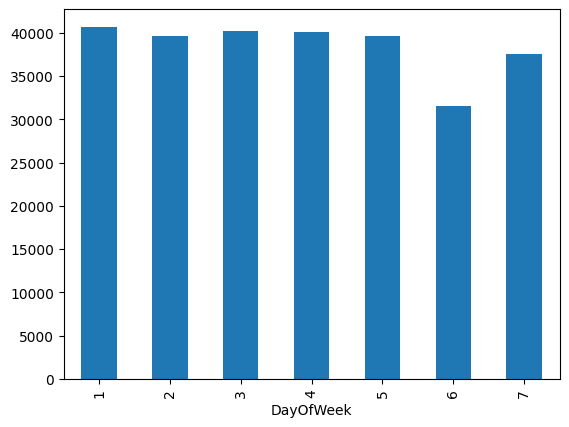

In [10]:
# Arrival deplays on diferent days of the week
df_flights_cleaned['DayOfWeek'].value_counts().sort_index().plot(kind='bar')


In [ ]:
# df_flights_cleaned groupd by DayOfWeek and calculate the average ArrDelay for each day of the week
# 1 = Monday, 2 = Tuesday, ..., 7 = Sunday
# Which day of the week has the highest average arrival delay?
df_flights_grouped_day = df_flights_cleaned.groupby('DayOfWeek')['ArrDelay'].mean().reset_index()
df_flights_grouped_day.rename(columns={'ArrDelay': 'AvgArrDelay'}, inplace=True)
df_flights_grouped_day.sort_values(by='AvgArrDelay', ascending=False)

,DayOfWeek,AvgArrDelay
3,4,10.827256
4,5,8.614634
2,3,7.093438
0,1,6.878389
6,7,4.998399
1,2,4.328701
5,6,2.152108


In [15]:
# df_flights_cleaned grouped by Origin and Dest to see the top 10 routes with the highest average DepDelay
df_flights_grouped_route = df_flights_cleaned.groupby(['OriginAirportName', 'DestAirportName'])['DepDelay'].mean().reset_index()
df_flights_grouped_route.rename(columns={'DepDelay': 'AvgDepDelay'}, inplace=True)
df_flights_grouped_route.sort_values(by='AvgDepDelay', ascending=False).head(10)
# df_flights_grouped_route.sort_values(by='AvgDepDelay', ascending=False)


,OriginAirportName,DestAirportName,AvgDepDelay
2268,Southwest Florida International,Denver International,78.400000
444,Dallas/Fort Worth International,Kahului Airport,63.578947
928,John F. Kennedy International,Richmond International,62.000000
1391,Metropolitan Oakland International,Logan International,55.222222
1848,Pittsburgh International,Raleigh-Durham International,55.000000
1610,Norfolk International,Minneapolis-St Paul International,52.473684
2261,Southwest Florida International,Buffalo Niagara International,52.200000
1487,Minneapolis-St Paul International,Richmond International,51.416667
1979,Richmond International,Minneapolis-St Paul International,50.222222
2463,William P Hobby,LaGuardia,50.040000


In [16]:
# df_flights_cleaned grouped by OriginAirportName to see the top 10 origin airports with the highest average DepDelay
df_flights_grouped_origin = df_flights_cleaned.groupby('OriginAirportName')['DepDelay'].mean().reset_index()
df_flights_grouped_origin.rename(columns={'DepDelay': 'AvgDepDelay'}, inplace=True)
df_flights_grouped_origin.sort_values(by='AvgDepDelay', ascending=False).head(10)
# df_flights_grouped_origin.sort_values(by='AvgDepDelay', ascending=False)

,OriginAirportName,AvgDepDelay
8,Chicago O'Hare International,16.656477
7,Chicago Midway International,16.083384
12,Dallas/Fort Worth International,14.492855
41,Newark Liberty International,14.203831
23,John F. Kennedy International,14.047801
60,San Francisco International,13.894762
13,Denver International,13.684571
2,Baltimore/Washington International Thurgood Ma...,13.289301
69,William P Hobby,12.885065
27,LaGuardia,12.134201


In [17]:
# df_flights_cleaned grouped by DestAirportName to see the top 10 destination airports with the highest average ArrDelay
df_flights_grouped_dest = df_flights_cleaned.groupby('DestAirportName')['ArrDelay'].mean().reset_index()
df_flights_grouped_dest.rename(columns={'ArrDelay': 'AvgArrDelay'}, inplace=True)
df_flights_grouped_dest.sort_values(by='AvgArrDelay', ascending=False).head(10)
# df_flights_grouped_dest.sort_values(by='AvgArrDelay', ascending=False)

,DestAirportName,AvgArrDelay
60,San Francisco International,13.189758
41,Newark Liberty International,11.679841
27,LaGuardia,11.513981
23,John F. Kennedy International,10.656690
68,Will Rogers World,10.534099
54,Richmond International,9.925729
8,Chicago O'Hare International,9.751189
50,Port Columbus International,9.603751
1,Austin - Bergstrom International,9.477157
33,Louisville International-Standiford Field,9.346667


In [18]:
# df_flights_cleaned grouped by Origin and Dest to see the top 10 routes with the highest average ArrDelay
df_flights_grouped_route_arr = df_flights_cleaned.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().reset_index()
df_flights_grouped_route_arr.rename(columns={'ArrDelay': 'AvgArrDelay'}, inplace=True)
df_flights_grouped_route_arr.sort_values(by='AvgArrDelay', ascending=False).head(10)
# df_flights_grouped_route_arr.sort_values(by='AvgArrDelay', ascending=False)

,OriginAirportName,DestAirportName,AvgArrDelay
2268,Southwest Florida International,Denver International,81.000000
928,John F. Kennedy International,Richmond International,78.200000
1848,Pittsburgh International,Raleigh-Durham International,63.000000
444,Dallas/Fort Worth International,Kahului Airport,59.263158
1391,Metropolitan Oakland International,Logan International,54.111111
1487,Minneapolis-St Paul International,Richmond International,48.416667
1595,Newark Liberty International,Will Rogers World,47.277778
2284,Southwest Florida International,Theodore Francis Green State,44.000000
1610,Norfolk International,Minneapolis-St Paul International,39.421053
2261,Southwest Florida International,Buffalo Niagara International,38.400000


In [21]:
# df_flights_cleaned grouped by Origin and Dest to see the top 10 routes with the highest count of late arrivals (ArrDelay > 0)
df_flights_grouped_route_late = df_flights_cleaned[df_flights_cleaned['ArrDel15'] > 0].groupby(['OriginAirportName', 'DestAirportName']).size().reset_index(name='LateArrivalsCount')
df_flights_grouped_route_late.sort_values(by='LateArrivalsCount', ascending=False).head(10)
# df_flights_grouped_route_late.sort_values(by='LateArrivalsCount', ascending=False)

,OriginAirportName,DestAirportName,LateArrivalsCount
1172,Los Angeles International,San Francisco International,291
2121,San Francisco International,Los Angeles International,242
1303,McCarran International,San Francisco International,198
1000,LaGuardia,Hartsfield-Jackson Atlanta International,182
758,Hartsfield-Jackson Atlanta International,LaGuardia,169
889,John F. Kennedy International,Los Angeles International,148
287,Chicago O'Hare International,LaGuardia,146
280,Chicago O'Hare International,Hartsfield-Jackson Atlanta International,143
1281,McCarran International,Los Angeles International,140
1151,Los Angeles International,McCarran International,139


<Axes: xlabel='DepDelay', ylabel='ArrDelay'>

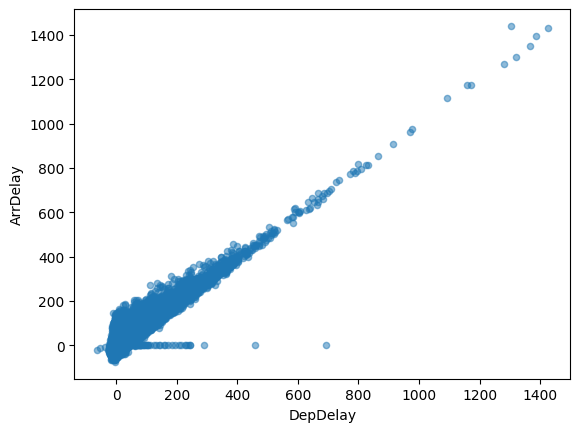

In [24]:
# late departure tend to affect late arrivals
df_flights_cleaned.plot.scatter(x='DepDelay', y='ArrDelay', alpha=0.5)